In [1]:
# 標準ライブラリ
import os

# サードパーティ製ライブラリ
import matplotlib.pyplot as plt
import paretoset

# その他のライブラリ
import lab.moea.post as lmp
import lab.moea.viz as lmv

# 作業ディレクトリの確認
os.getcwd()

'/rst4_data/workspace6/tatsukawa/Repos/MOEAFramework/python'

In [2]:
# 計算結果の起点となるパス
output_base_path = './sampleresult'

# リファレンスデータセット（パレートフロント・データセット）のベースパス
refset_base_path = '../pf'

# 目的関数の数
nobj = 2
# ベンチマーク問題
pName = 'DTLZ2'
# 最適化アルゴリズム
aNames = ['MOEAD-LAB', 'NSGAII-LAB', 'NSGAIII-LAB']
# 試行回数
ntrial = 10

# リファレンスデータセットのファイル名を含むパス（DTLZ, WFGシリーズの場合）
refset_path = '{}/{}.{}D.pf'.format(refset_base_path, pName, str(nobj))

# 計算結果のパス（目的関数を追加。この下にアルゴリズム/試行
base_path = '{}/{}'.format(output_base_path, pName)

In [3]:
# 評価値の平均値を計算しファイルに保存する(1度だけ実行すればよい)
lmp.makeMeanAccumDatas(base_path, aNames, ntrial)


MOEAD-LAB
NSGAII-LAB
NSGAIII-LAB


In [4]:
# 計算した平均値の読み込み
meanAccumDatas = lmp.loadMeanAccumDatas(base_path, aNames)

MOEAD-LAB
NSGAII-LAB
NSGAIII-LAB


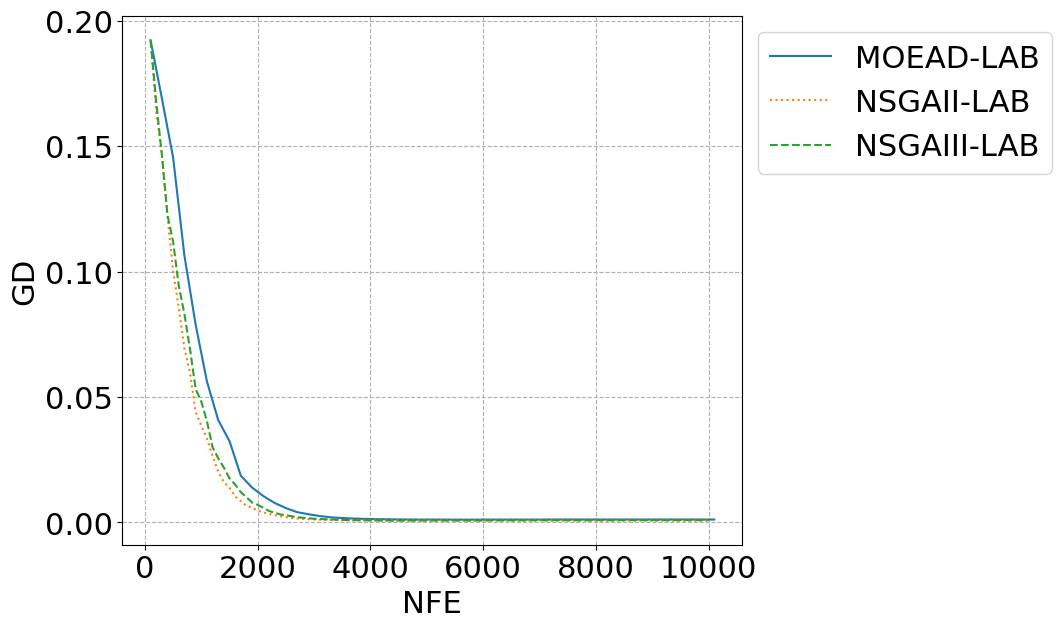

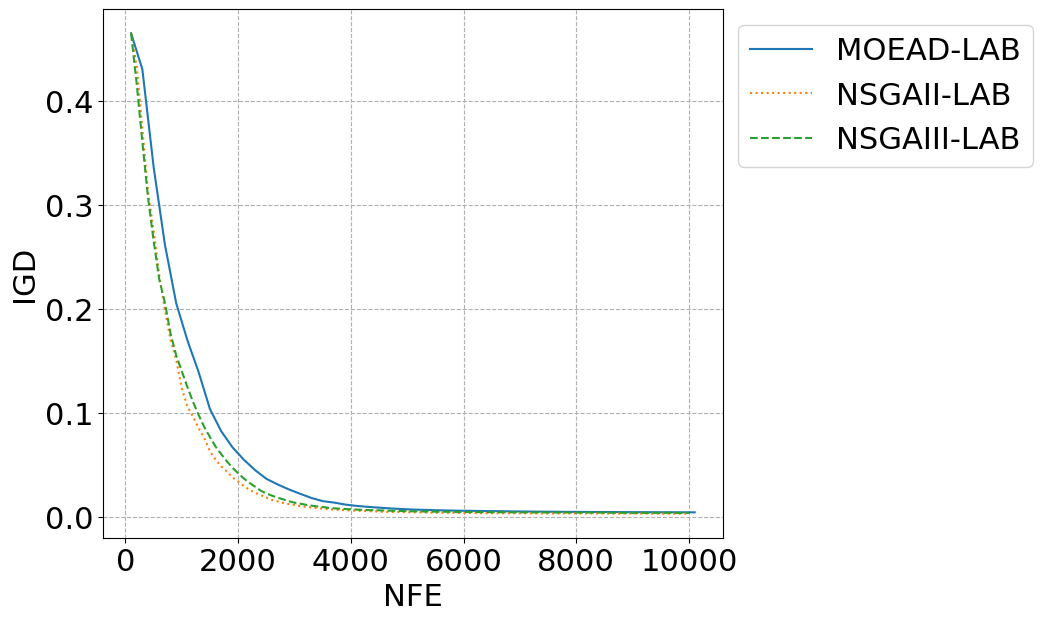

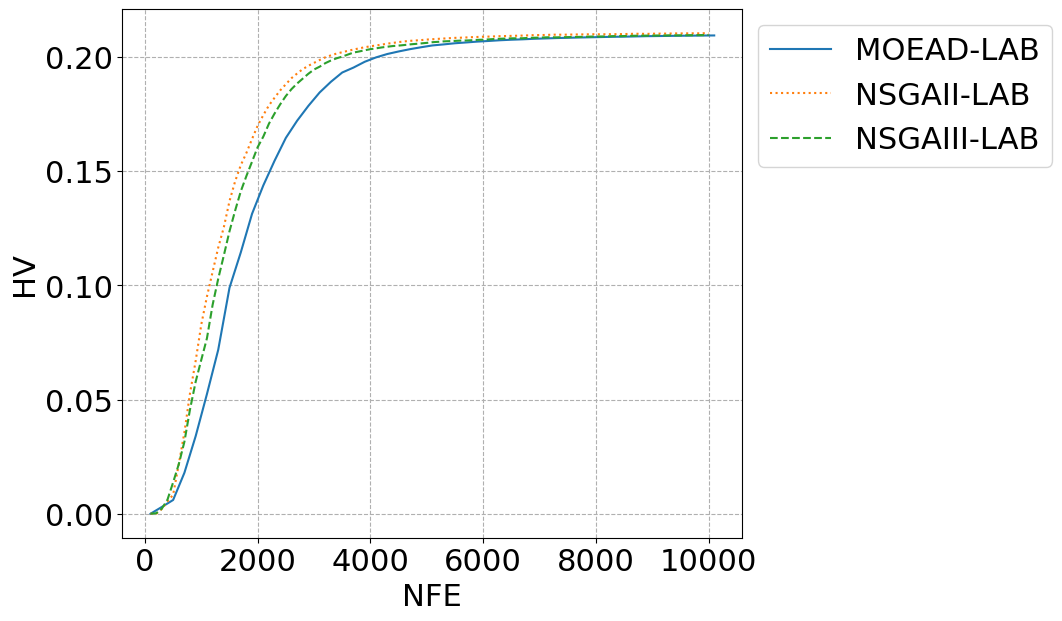

In [5]:
# 評価値の平均値の可視化
fig = lmv.plot_accumDatas(meanAccumDatas, 'NFE', 'GenerationalDistance', 'NFE', 'GD', 'upper left', (1, 1))
fig = lmv.plot_accumDatas(meanAccumDatas, 'NFE', 'InvertedGenerationalDistance', 'NFE', 'IGD', 'upper left', (1, 1))
fig = lmv.plot_accumDatas(meanAccumDatas, 'NFE', 'Hypervolume', 'NFE', 'HV', 'upper left', (1, 1))

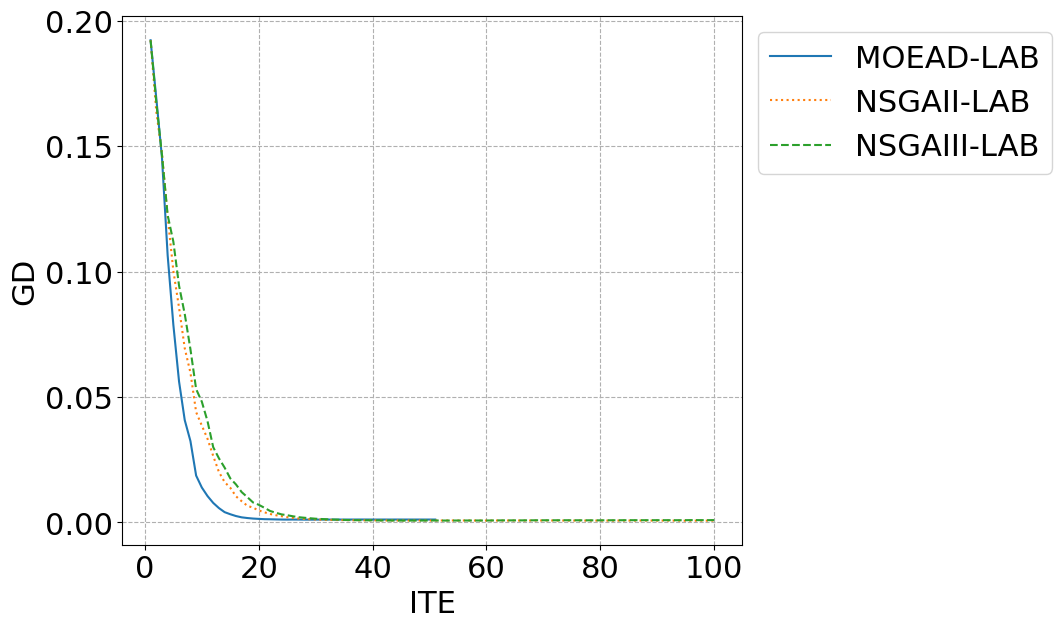

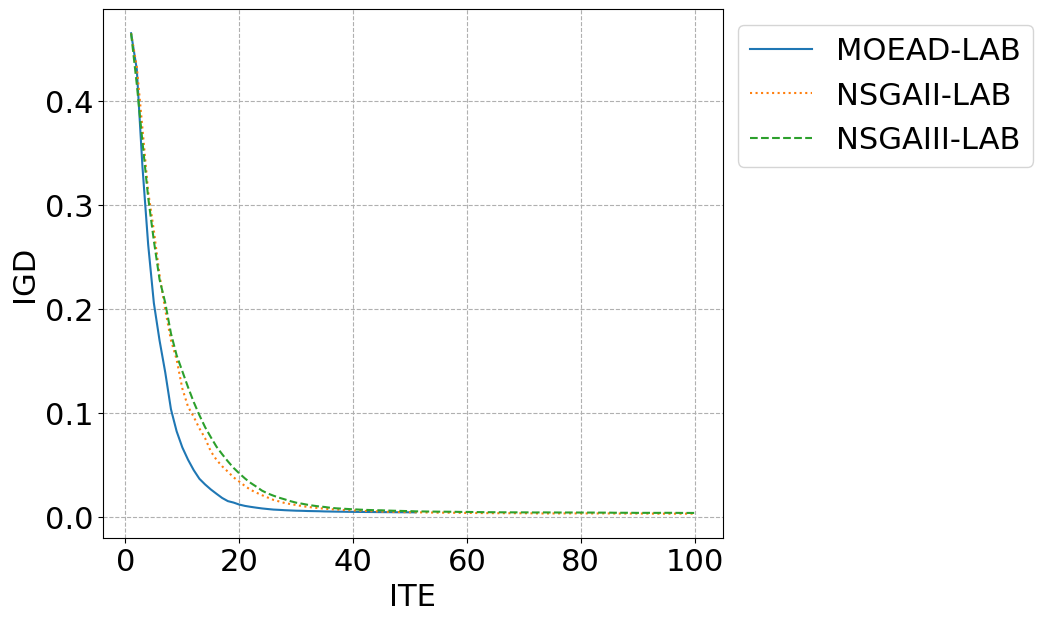

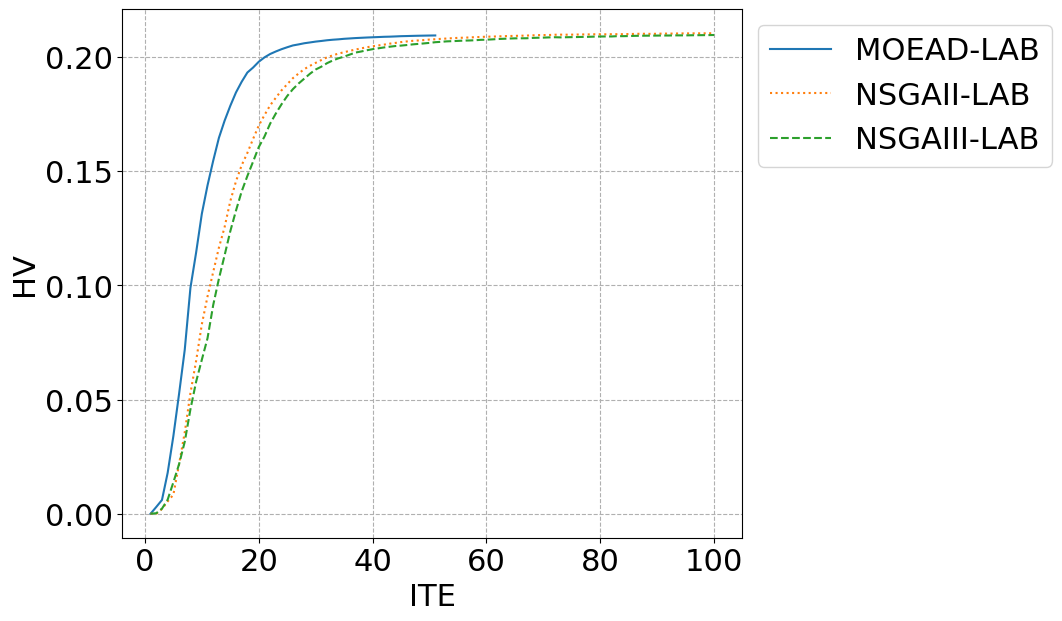

In [6]:
# 評価値の平均値の可視化
fig = lmv.plot_accumDatas(meanAccumDatas, 'ITE', 'GenerationalDistance', 'ITE', 'GD', 'upper left', (1, 1))
fig = lmv.plot_accumDatas(meanAccumDatas, 'ITE', 'InvertedGenerationalDistance', 'ITE', 'IGD', 'upper left', (1, 1))
fig = lmv.plot_accumDatas(meanAccumDatas, 'ITE', 'Hypervolume', 'ITE', 'HV', 'upper left', (1, 1))

In [7]:
# history_pf.txtファイルの読み込み
trial = 0
aName = aNames[0]
history = lmp.HistoryData('{}/{}/{}/history_pf.txt'.format(base_path, aName, str(trial)))


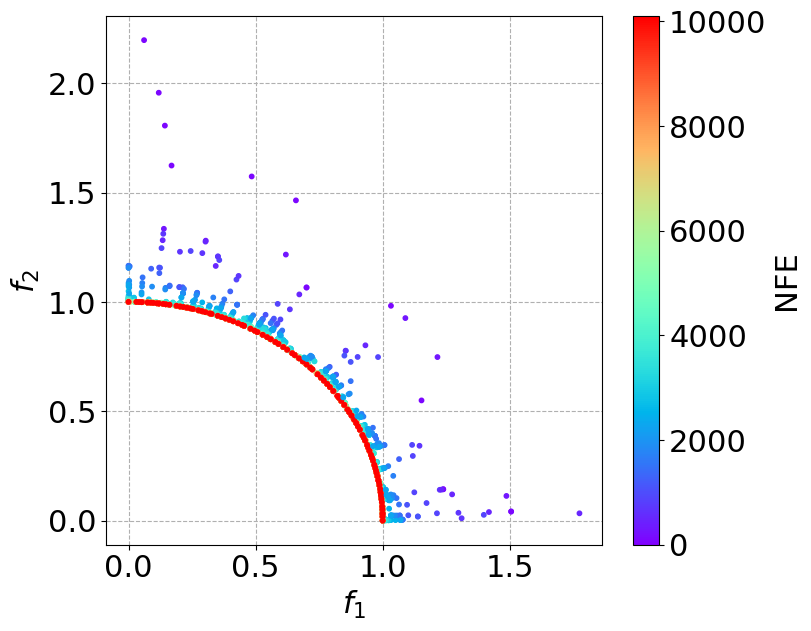

In [8]:
# historyの可視化
fig = lmv.scatter2D_obj_history(history)

In [9]:
# リファレンスデータセット（パレートフロント・データセット）を読み込む
refset = lmp.loadReferenceSet(refset_path, nobj)

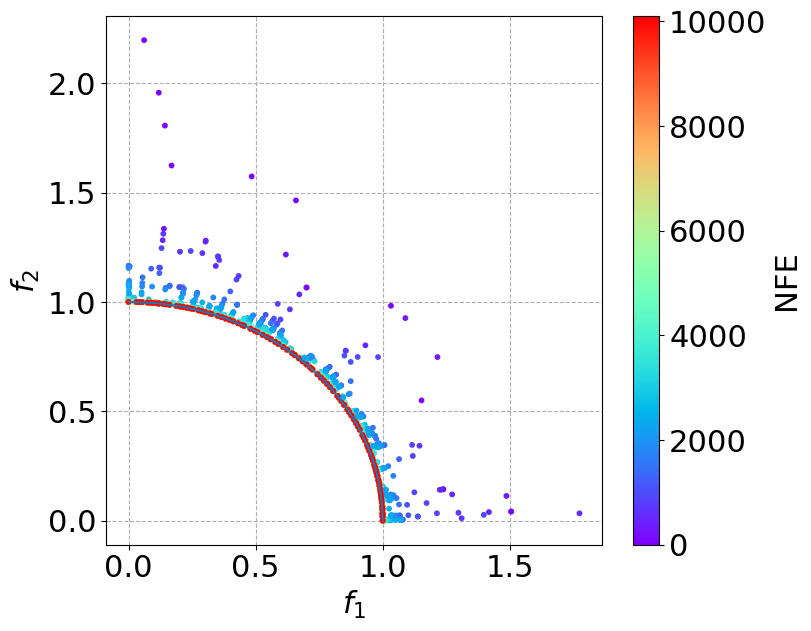

In [10]:
# リファレンスデータセットhistoryの可視化
fig = lmv.scatter2D_obj_history_with_referenceset(history, refset)

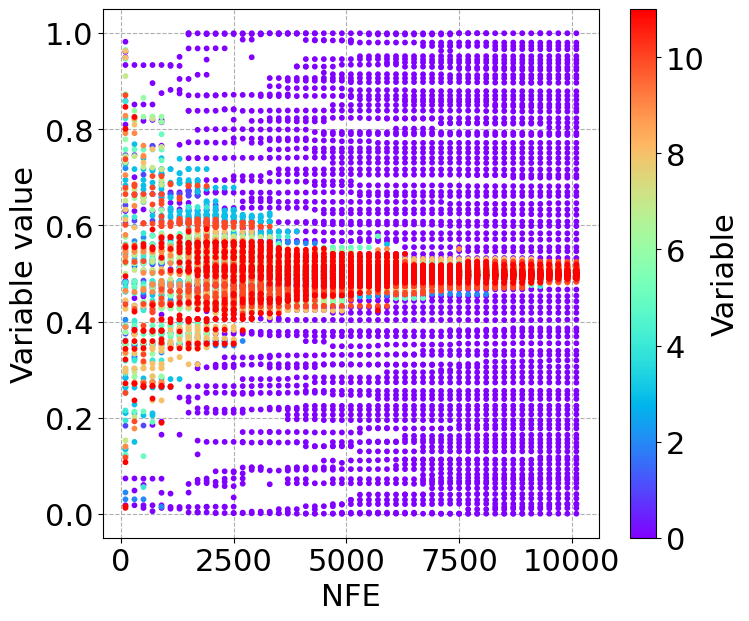

In [11]:
# 設計変数の履歴の可視化(全変数を可視化)
fig = lmv.scatter2D_var_history(history)

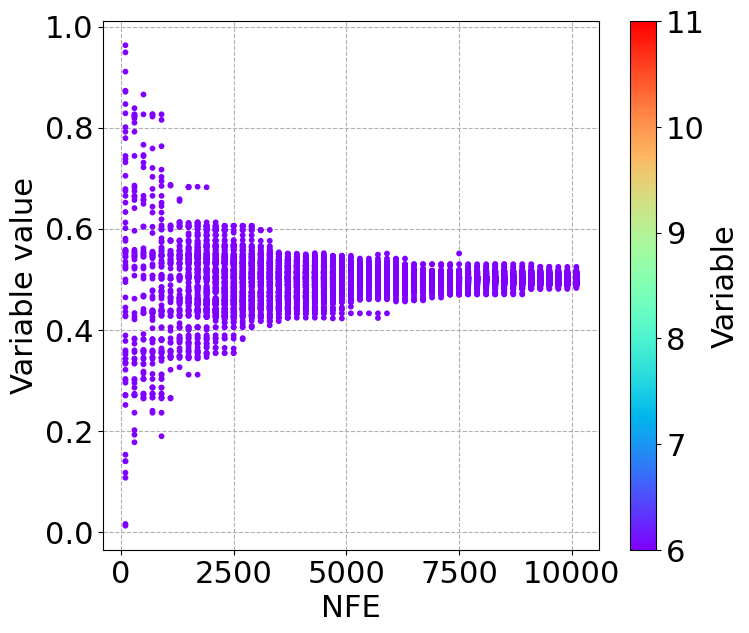

In [13]:
# 設計変数の履歴の可視化(変数のサブセットを可視化)
variable_ids = [i for i in range(6, 12)]
fig = lmv.scatter2D_var_history(history, variable_ids)

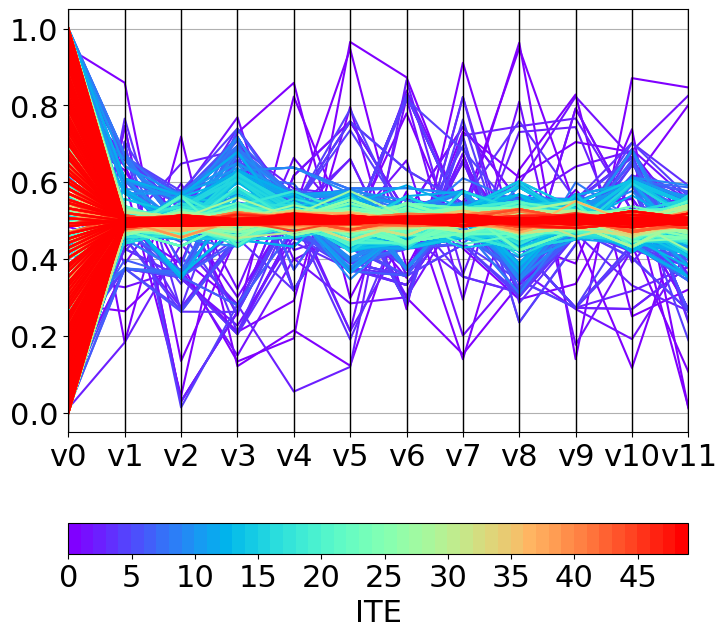

In [14]:
# 設計変数の並行座標プロット
fig = lmv.parallel_coordinates_var_history(history)

In [16]:
# figを使って画像をpdfに保存(拡張子を変えれば他のフォーマットも可能)
lmv.savefig(fig, 'pcp_result.pdf')  # evinceコマンドで確認できる(Ubuntuの場合)
lmv.savefig(fig, 'pcp_result.png')  # eogコマンドで確認できる(Ubuntuの場合)